# Amazon Forest Wildfire and Deforestation

This is a set of code that was made to visualize the data downloaded from Mariana B. Netto project on Kaggle. 

The Amazon rainforest is a humid broadleaf rainforest in the Amazon biome that covers up to nine countries. It is an ecosystem of great biodiversity and also home to various animals and vegetations. The Amazon rainforest creates its own climate and affect climates all around the world.

But as the time goes by, the forest itself is decreasing. It may caused by many things such as illegal logging, natural disasters, and urbanization.

This project refers to 3 dataset:
*the data collection was done by Mariana B. Netto

-'inpebrazilianamazonfires1999_2019' : amount of fire outbreaks in Brazilian Amazon by state, month and year, from 1999 to 2019. The original data are public and were extracted from INPE website on December 13th 2019.

-'defarea2004_2019' : deforestation area (km²) by year and state, from 2004 to 2019. The data are public and were extracted from INPE website on December 16th 2019. 

-'elninolanina1999_2019' : Data about start year, end year, and severity of 2 of the most important climatic phenomena.
Data were extracted from Golden Gate Weather Services on December 20th 2019 and were unpivoted.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings
from numpy import cov
from scipy.stats import pearsonr
warnings.filterwarnings('ignore')

In [2]:
# Read Data File
df1 = pd.read_csv('C:\\Users\\Fadhilah Ajie\Desktop\Python Course\deforestation\inpe_brazilian_amazon_fires_1999_2019.csv')
df2 = pd.read_csv('C:\\Users\\Fadhilah Ajie\Desktop\Python Course\deforestation\el_nino_la_nina_1999_2019.csv')
df3 = pd.read_csv('C:\\Users\\Fadhilah Ajie\Desktop\Python Course\deforestation\def_area_2004_2019.csv')

In [3]:
df2.head()

,start year,end year,phenomenon,severity
0,2004,2005,El Nino,Weak
1,2006,2007,El Nino,Weak
2,2014,2015,El Nino,Weak
3,2018,2019,El Nino,Weak
4,2002,2003,El Nino,Moderate


# Wildfire Cases 1999-2019

First, lets see the amount of firespots per year

In [4]:
df1_GroupByYear = df1.groupby(["year"]).agg({'firespots': 'sum'}).reset_index()

In [5]:
df1_GroupByYear

,year,firespots
0,1999,62858
1,2000,48168
2,2001,69675
3,2002,273873
4,2003,174400
5,2004,218637
6,2005,213720
7,2006,144422
8,2007,186480
9,2008,103453


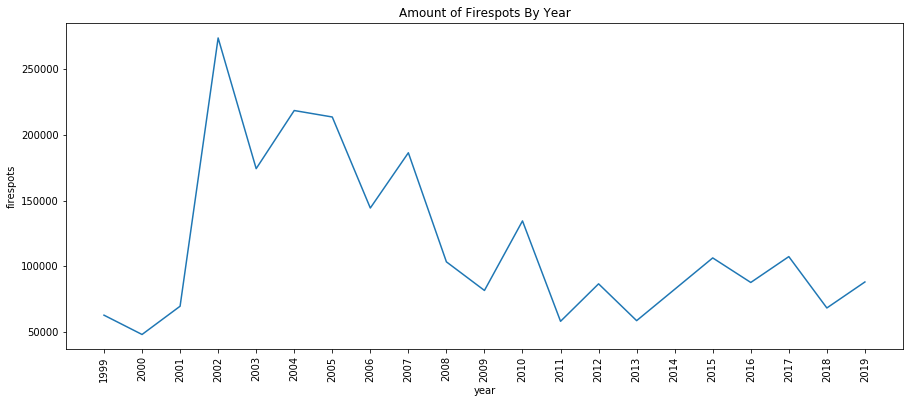

In [6]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(df1_GroupByYear["year"], df1_GroupByYear["firespots"], ci=None)
plt.xticks (list(range(1999,2020)), rotation='vertical')
plt.title("Amount of Firespots By Year");

It looks like the amount of firespots increased drastically during early 2000s and reached it's peak in 2002 with over 250k firespots. Then it started to had reversal trend after 2002 and continued to go downtrend up but with up and down volatility until 2013. After that, the wildfire increased during 2014-2017, and decreased in 2018 but increasing again up until 2019.

To be more specific, lets see the monthly breakdown of firespots occurence.

In [7]:
df1_GroupByMonth = df1.groupby(["month"]).agg({'firespots': 'sum'}).reset_index()

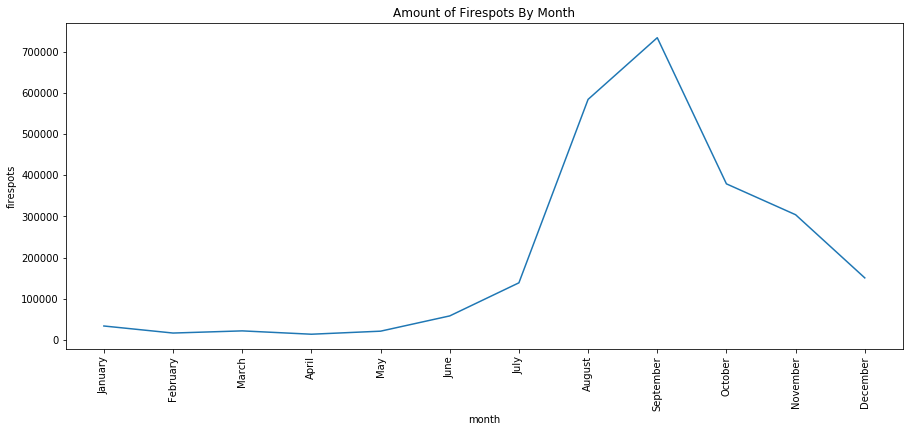

In [8]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(df1_GroupByMonth["month"], df1_GroupByMonth["firespots"], ci=None)
plt.xticks (list(range(1,13)), ['January','February','March','April','May','June','July','August','September','October','November','December'], rotation='vertical')
plt.title("Amount of Firespots By Month");

As we seen the firespots occurence raised rapidly during July to Sepetember.

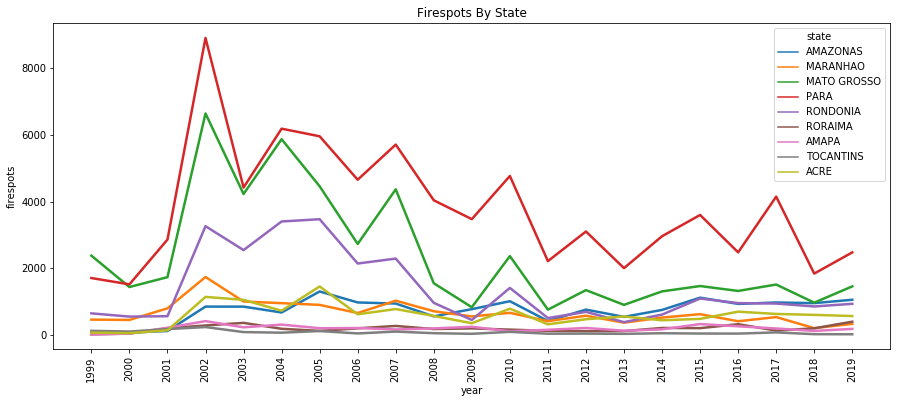

In [9]:
fig = plt.figure(figsize=(15,6))
sns.lineplot("year", df1.firespots, hue = "state",
             data = df1, linewidth = 2.5, style = "state", markers=False
            , dashes=False, ci=None)
plt.xticks (list(range(1999,2020)), rotation='vertical')
plt.title("Firespots By State")
plt.show()

The graph above shows the fluctuation of firespots by each state in 20 year period. For more precise, we may look into separated graph below.

In [10]:
df1_amazonas =  df1.query('state == "AMAZONAS"')
df1_maranhao =  df1.query('state == "MARANHAO"')
df1_matogrosso =  df1.query('state == "MATO GROSSO"')
df1_para =  df1.query('state == "PARA"')
df1_rondonia =  df1.query('state == "RONDONIA"')
df1_roraima =  df1.query('state == "RORAIMA"')
df1_amapa =  df1.query('state == "AMAPA"')
df1_tocantins =  df1.query('state == "TOCANTINS"')
df1_acre =  df1.query('state == "ACRE"')

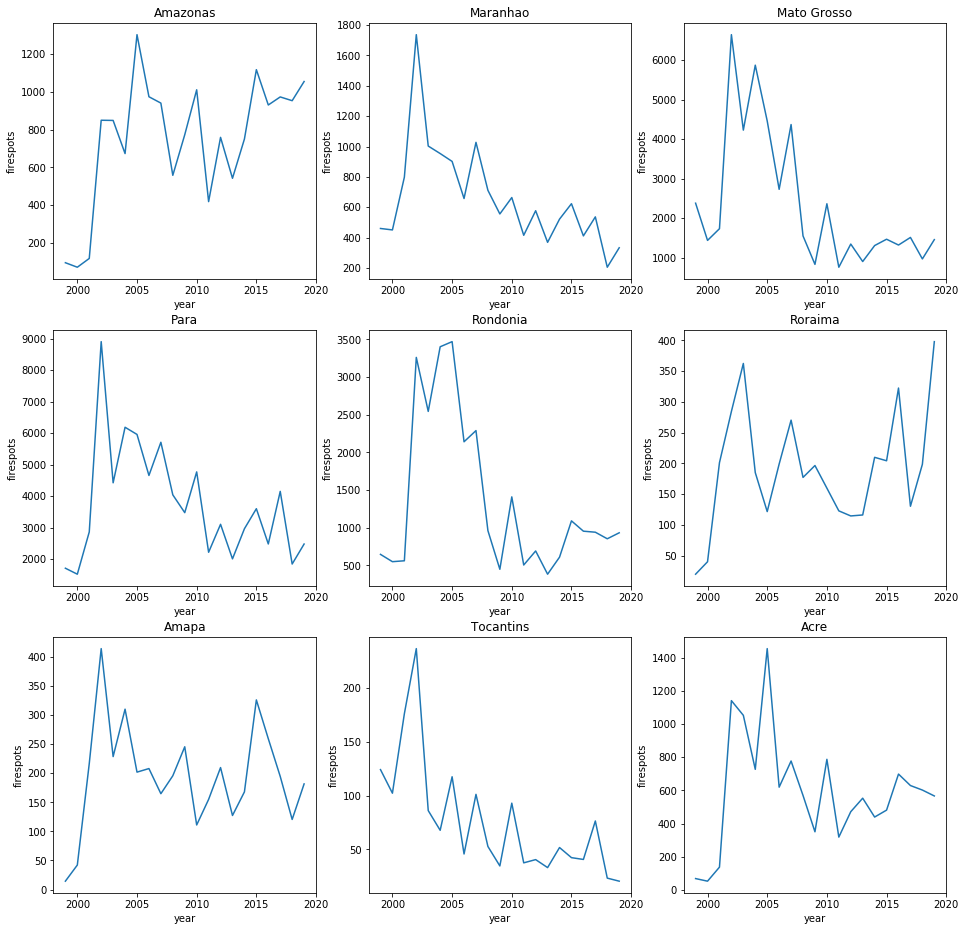

In [11]:
fig, axs = plt.subplots(3,3, figsize=(16,16))

#Amazonas
sns.lineplot(ax=axs[0,0], data= df1_amazonas, x="year", y="firespots", ci=None).set_title("Amazonas");

#Maranhao
sns.lineplot(ax=axs[0,1], data= df1_maranhao, x="year", y="firespots", ci=None).set_title("Maranhao");

#Mato Grosso
sns.lineplot(ax=axs[0,2], data= df1_matogrosso, x="year", y="firespots", ci=None).set_title("Mato Grosso");

#Para
sns.lineplot(ax=axs[1,0], data= df1_para, x="year", y="firespots", ci=None).set_title("Para");

#Rondonia
sns.lineplot(ax=axs[1,1], data= df1_rondonia, x="year", y="firespots", ci=None).set_title("Rondonia");

#Roraima
sns.lineplot(ax=axs[1,2], data= df1_roraima, x="year", y="firespots", ci=None).set_title("Roraima");

#Amapa
sns.lineplot(ax=axs[2,0], data= df1_amapa, x="year", y="firespots", ci=None).set_title("Amapa");

#Tocantins
sns.lineplot(ax=axs[2,1], data= df1_tocantins, x="year", y="firespots", ci=None).set_title("Tocantins");

#Acre
sns.lineplot(ax=axs[2,2], data= df1_acre, x="year", y="firespots", ci=None).set_title("Acre");

Based on the graph above, we know that state with most firespots is located in Para. Also, the peak that was created in 2002 was mainly caused by the fires in Para, Mato Grosso and Rondonia. Maranhao, Amapa and Tocantins showed similar behavior but in smaller scale. Amazonas and Acre have slightly different behavior with reaching it's peak in 2005-2006.

# Climate Phenomenon 1999-2019

One of the cause might be the climate phenomenon that happened during that time. Let's see the historical data of El Nino and La Nina phenomenon from 1999 to 2019.

In [12]:
df2_GroupBySev = df2.groupby(["severity"]).agg({'phenomenon': 'count'}).reset_index()
df2_GroupByPhen = df2.groupby(["phenomenon"]).count().reset_index()

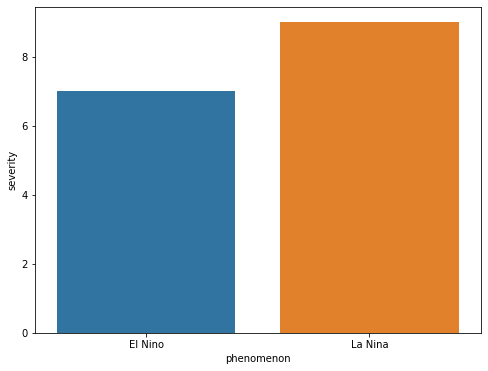

In [13]:
fig = plt.figure(figsize=(8,6))
sns.barplot(x="phenomenon", y="severity", data= df2_GroupByPhen);

From the barplot we know that La Nina occured more often than El Nino during those 20 year period. According to researchers, La Nina likely to cause more intense impacts over many land regions - amplifying changes to temperature, precipitation and wildfire.

Moreover, we shall look to it's severity

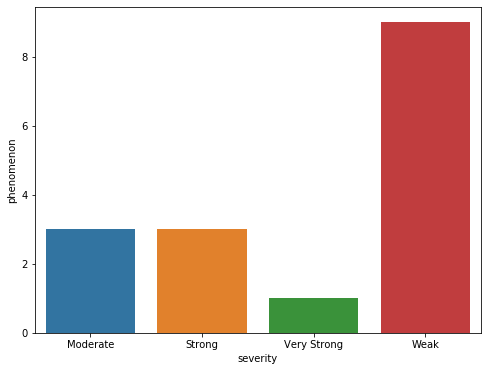

In [14]:
fig = plt.figure(figsize=(8,6))
sns.barplot(x="severity", y="phenomenon", data= df2_GroupBySev);

The graph above shows that most of the events are considerably weak.

# Deforestation Area

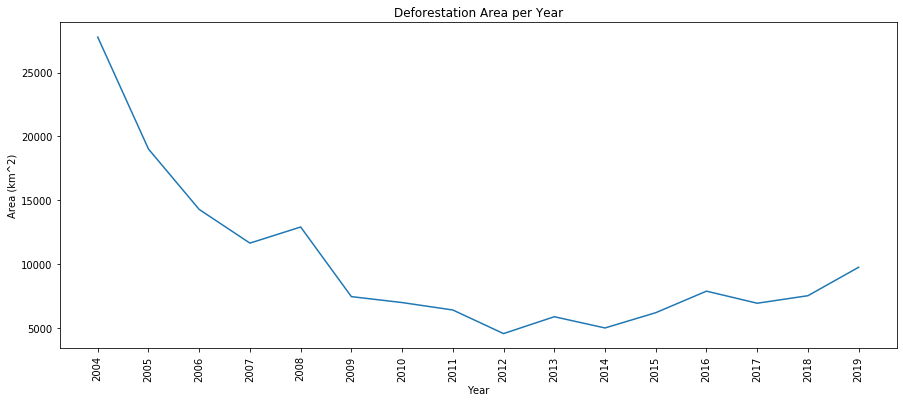

In [15]:
fig = plt.figure(figsize=(15,6))
sns.lineplot(df3["Ano/Estados"], df3["AMZ LEGAL"], ci=None)
plt.xticks (list(range(2004,2020)), rotation='vertical')
plt.title("Deforestation Area per Year")
plt.xlabel("Year")
plt.ylabel("Area (km^2)");

The lieplot above shows that the deforestation area was very high in 2004. Then, it's started to decline until 2012 (except in 2008). But after that the deforestation area per year increasing again. Also, if we compare Deforestation Area per Year graph with Amount of Firespots per Year graph, we can see the positive correlation between those 2 graphs. 

Let's see the cumulative deforestation area in those 15 years period.

In [16]:
df3['cumulative_deforestation_area'] = df3['AMZ LEGAL'].cumsum()

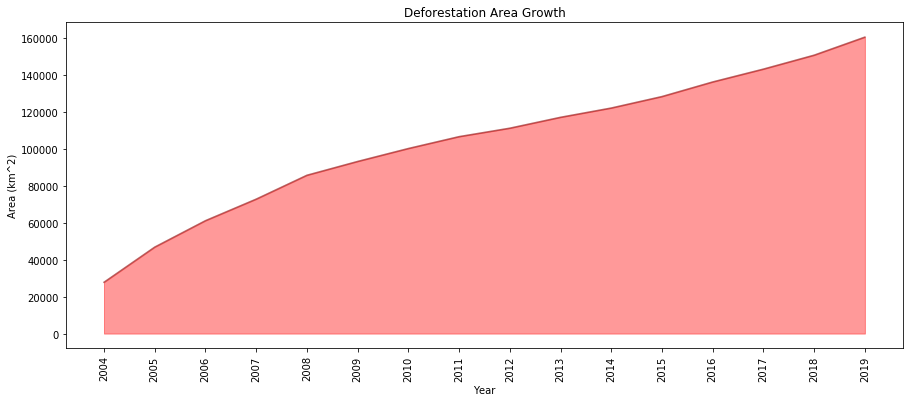

In [17]:
fig = plt.figure(figsize=(15,6))
plt.fill_between(df3["Ano/Estados"], df3['cumulative_deforestation_area'],color="red", alpha=0.4)
plt.plot(df3["Ano/Estados"], df3['cumulative_deforestation_area'], color="DarkRed", alpha=0.6)
plt.xticks (list(range(2004,2020)), rotation='vertical')
plt.title("Deforestation Area Growth")
plt.xlabel("Year")
plt.ylabel("Area (km^2)");

In a spare of 15 years, the amazon had lost more than 100k km^2 of its vegetation.

# Comparing Datasets

First, lets take a look to the comparison between the fire outbreaks and deforested area.

In [18]:
amazon_def_by_year = df3.groupby("Ano/Estados", as_index=False).sum()

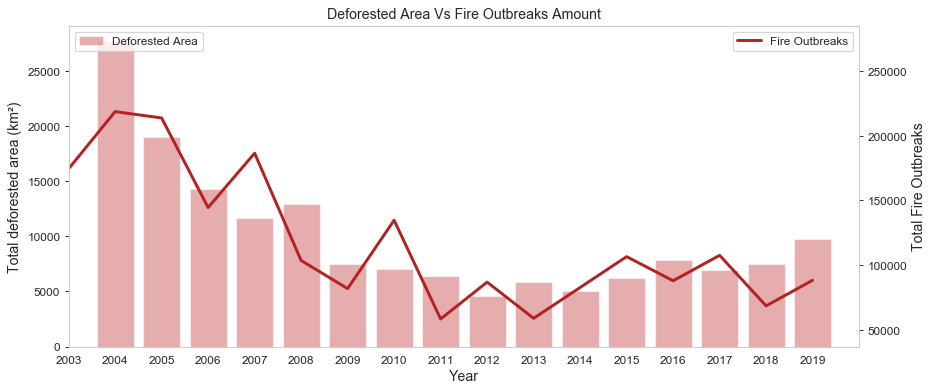

In [21]:
fig, ax = plt.subplots(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

ax.bar(amazon_def_by_year['Ano/Estados'], amazon_def_by_year['AMZ LEGAL'], color='indianred', alpha=0.5, label='Deforested Area')
plt.grid(False)
ax.legend(loc="upper left")
ax.set_ylabel("Total deforested area (km²)", size="large")
ax.set_xlabel("Year", size="large")
ax.set_title("Deforested Area Vs Fire Outbreaks Amount")

ax2 = ax.twinx()
sns.lineplot(x=df1_GroupByYear['year'], y=df1_GroupByYear['firespots'], estimator='sum', color="firebrick", ci=None, ax=ax2, label='Fire Outbreaks', lw=2.5)
ax2.set_xticks(ticks=list(range(2003, 2020)))
ax2.set_xlim(2003, 2020)
ax2.set_ylabel("Total Fire Outbreaks", size="large")
plt.grid(False)
ax2.legend();

The graph above shows us the linkage between occurence of fire outbreaks and forest deforestation in Amazon Rainforest, even though there are anomalies occured in 2007, 2010 and 2012.

To be more precise, lets see the correlation between those two.

In [23]:
comb = df1_GroupByYear[df1_GroupByYear['year'] > 2003].groupby('year').sum()
comb['AMZ LEGAL'] = amazon_def_by_year.groupby('Ano/Estados').sum()['AMZ LEGAL']

#calculating the correlation
comb[["firespots", "AMZ LEGAL"]].corr()

,firespots,AMZ LEGAL
firespots,1.000000,0.833778
AMZ LEGAL,0.833778,1.000000


The correlation is 0.833778. As we expected before, those two got pretty strong correlation.

Next, lets compare the deforested area and the weather phenomenon.

In [24]:
alpha_map = {
    "Weak":0.2,
    "Moderate": 0.3,
    "Strong": 0.4,
    "Very Strong":0.5
}

df2['alpha'] = df2["severity"].map(alpha_map)

In [26]:
el_nino_records = df2[df2['phenomenon'] == 'El Nino'].copy()
la_nina_records = df2[df2['phenomenon'] == 'La Nina'].copy()

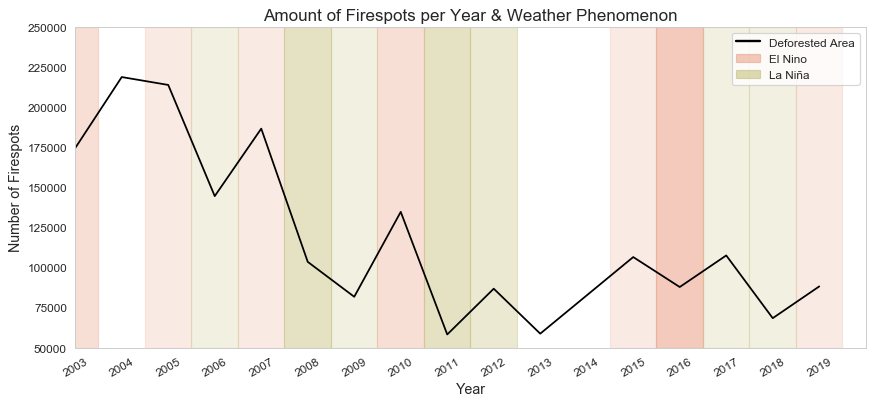

In [68]:
fig, ax = plt.subplots(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

for i, row in el_nino_records.iterrows(): 
    ax.axvspan(row["start year"]+0.5, row["end year"]+0.5, alpha=row["alpha"], color='darksalmon', edgecolor=None, label='El Niño')

for i, row in la_nina_records.iterrows(): 
    ax.axvspan(row["start year"]+0.5, row["end year"]+0.5, alpha=row["alpha"], color='darkkhaki', edgecolor=None, label='La Niña')

sns.lineplot(x=df1_GroupByYear["year"], y=df1_GroupByYear["firespots"], color="black", ci=None, ax=ax)
ax.grid(False)

plt.xticks(ticks=list(range(2003, 2020)), rotation=30)
ax.set_xlim(2003, 2020)

plt.title("Amount of Firespots per Year & Weather Phenomenon", size="x-large")
plt.xlabel('Year', size="large")
plt.ylabel('Number of Firespots', size="large")

from matplotlib.lines import Line2D 
from matplotlib.patches import Patch

legend_elements = [Line2D([0], [0], color='black', lw=2, label='Deforested Area'),
                   Patch(facecolor='darksalmon', edgecolor='darksalmon', label='El Nino', alpha=0.5),
                   Patch(facecolor='darkkhaki', edgecolor='darkkhaki', label='La Niña', alpha=0.5)]

ax.legend(handles=legend_elements)
ax.set_ylim(50000,250000);

El Niño produces some hot and humid air masses, while La Niña is the opposite condition. From the graph above, we know that weather phenomenon affected the number of firespots. In 2007, 2010, 2015 and 2019. When El Niño occured, we can see the increasing number of firespots. But, there's an anomaly in 2016, that is shown by the decreasing number of firespots when the phenomenon was considered as "strong".

# Conclusion

1.After 2002, the trend of fire outbreak started to go down

2.States with most firespots is located in Para, Mato Grosso and Rondonia. They also have similar trend of volatility, especially in early 2000s.

3.There is a strong correlation between number of firespot or fire outbreak with the broad of deforestation with correlation number reach 0.83. This also means that wildfire is not the only cause of Amazon deforestation.

4.The El Niño phenomenon mostly caused the increasing number of firespots per year, except in 2016. This means the El Niño has impact to deforestation caused by wildfire. Even though there are some anomalies,overall there is a trend of increasing the amount of fire outbreaks in years with the occurrence of El Niño and decrease with the occurrence of La Niña.